In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import Datasets


In [3]:
all_df= pd.read_csv('../datasets/synthetic_fraud_data.csv')

In [4]:
all_df.shape

(7483766, 24)

In [5]:
# df= all_df.sample(frac=0.1, random_state=42)
df= all_df.sample(frac=0.6)
df.shape

(4490260, 24)

#### Feature Engineering

In [6]:
df.columns

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'merchant_category', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'card_present', 'device',
       'channel', 'device_fingerprint', 'ip_address', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction',
       'velocity_last_hour', 'is_fraud'],
      dtype='object')

In [7]:
df.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,...,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
6480483,TX_33834d29,CUST_80474,4570511070918717,2024-10-26 19:50:49.045686+00:00,Education,online,MasterClass,691.19,SGD,Singapore,...,Safari,web,a99e96e0ffebd9ff4d70650b1da3a7c9,108.138.180.122,0,False,19,True,"{'num_transactions': 118, 'total_amount': 3752...",False
5397118,TX_6cc07933,CUST_50186,6714757295166143,2024-10-22 09:48:55.061560+00:00,Grocery,online,Instacart,472.36,CAD,Canada,...,Safari,web,98ba7848324fee22ea59d5735405e956,6.31.169.171,0,False,9,False,"{'num_transactions': 267, 'total_amount': 9824...",False
2729044,TX_ca96de3e,CUST_36311,377495852165494,2024-10-11 08:41:03.483829+00:00,Education,supplies,Barnes & Noble,367.40,EUR,Germany,...,Chrome,web,6da0901cc29204c592368cdd51108bbd,189.190.107.195,1,False,8,False,"{'num_transactions': 727, 'total_amount': 2261...",False
5061356,TX_7ae81536,CUST_75433,5461777822781617,2024-10-20 23:07:58.108767+00:00,Entertainment,streaming,Spotify,52.77,EUR,Germany,...,Edge,web,0a98468e4338d76de9e82051b2b545da,22.107.50.156,0,True,23,True,"{'num_transactions': 386, 'total_amount': 9335...",False
6635427,TX_30e162de,CUST_51500,5462951307146229,2024-10-27 12:35:00.146073+00:00,Retail,physical,Costco,630.99,SGD,Singapore,...,Safari,web,46a1a4480d6cce7c59ca4798003399dd,86.146.150.39,0,False,12,True,"{'num_transactions': 90, 'total_amount': 11261...",False


#### features and label

In [8]:
df.merchant_type.value_counts()

merchant_type
online       841110
physical     561144
pharmacy     280903
medical      280822
local        280453
major        280326
supplies     279897
events       187982
streaming    187667
fast_food    187601
casual       187349
gaming       187161
premium      186517
booking      140688
transport    140424
hotels       140221
airlines     139995
Name: count, dtype: int64

col_to_drop= ['transaction_id', 'customer_id', 'card_number', 'timestamp', 'ip_address', 'velocity_last_hour']
one_enc= ['merchant_category', 'card_type', 'device', 'channel']
ord_enc= ['city_size']
freq_enc=  ['merchant_type', 'merchant', 'device_fingerprint', 'currency', 'country','city']
label_enc= ['card_present', 'high_risk_merchant', 'weekend_transaction']

num_cols= ['dis_from_home', 'transacton_hr', 'amount']

In [9]:
col_to_drop= ['transaction_id', 'customer_id', 'card_number', 'timestamp', 'ip_address', 'velocity_last_hour','device_fingerprint' ]
one_enc= ['merchant_category', 'card_type', 'device', 'channel']
ord_enc= ['city_size']
freq_enc=  ['merchant_type', 'merchant',  'currency', 'country','city']
label_enc= ['card_present', 'high_risk_merchant', 'weekend_transaction']

num_cols= ['distance_from_home', 'transaction_hour', 'amount']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler

#### feature and label

In [11]:
df.drop(col_to_drop, axis=1, inplace=True)

X= df.drop('is_fraud', axis=1)
y= df.is_fraud

#### train test split

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

In [13]:
X_train[:2]

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
3884527,Grocery,physical,Food Lion,655.55,BRL,Brazil,Unknown City,medium,Basic Debit,False,Safari,web,1,False,2,False
5983158,Grocery,physical,Whole Foods,347.78,AUD,Australia,Unknown City,medium,Gold Credit,False,Firefox,web,0,False,18,False


#### frequency encoding

In [14]:
# frequency encoding
all_freq_map= {}
for col in freq_enc:
    freq_map= X_train[col].value_counts().to_dict()
    all_freq_map[col]= freq_map     # save to all_freq_map  and dump later 
    X_train[col]= X_train[col].map(freq_map)
    
    # replace Nan with minimum value (for unseen data)    
    X_test[col]= X_test[col].map(freq_map).fillna(min(freq_map.values()))
    
# remaining encoding

#### feature encoding

In [15]:
ct= ColumnTransformer(transformers=[
    ('one-hot', OneHotEncoder(), one_enc),
    ('ordinal', OrdinalEncoder(categories= [['medium', 'large']]), ord_enc),
    # ('bin-value', LabelEncoder(), label_enc)
    
], remainder='passthrough')

le= LabelEncoder()
sc= StandardScaler()

# encode features
X_train_enc= ct.fit_transform(X_train)
X_test_enc= ct.transform(X_test)

# encode label 
y_train_enc= le.fit_transform(y_train)
y_test_enc= le.transform(y_test)

# standardarize 
X_train_enc= sc.fit_transform(X_train_enc)  # only numeric and frequency encoded columns only 
X_test_enc= sc.transform(X_test_enc)

X_train_enc= ct.fit_transform(X_train[:1000])
X_test_enc= ct.fit_transform(X_test[:1000])

X_train_enc= sc.fit_transform(X_train_enc)
X_test_enc= sc.transform(X_test_enc)


y_train_enc= le.fit_transform(y_train[:1000])
y_test_enc= le.transform(y_test[:1000])mm

In [16]:
X_train_enc

array([[-0.37745396, -0.37860345, -0.37775714, ..., -0.57811445,
        -1.55304221, -0.58918671],
       [-0.37745396, -0.37860345, -0.37775714, ..., -0.57811445,
         0.89370682, -0.58918671],
       [-0.37745396, -0.37860345, -0.37775714, ..., -0.57811445,
        -0.3296677 ,  1.69725485],
       ...,
       [-0.37745396, -0.37860345, -0.37775714, ..., -0.57811445,
        -1.70596403, -0.58918671],
       [-0.37745396, -0.37860345,  2.64720347, ..., -0.57811445,
        -1.70596403, -0.58918671],
       [-0.37745396,  2.64128604, -0.37775714, ...,  1.72976128,
         0.740785  , -0.58918671]])

#### get feature names

In [17]:
# Get feature names after transformation
feature_names = (ct.named_transformers_['one-hot'].get_feature_names_out(one_enc).tolist() + 
                ['city_size'] + 
                [col for col in X.columns if col not in one_enc + ord_enc])

X_train_enc= pd.DataFrame(data=X_train_enc, columns=feature_names)
X_test_enc= pd.DataFrame(data=X_test_enc, columns=feature_names)

In [18]:
X_test_enc[:2]

,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,card_type_Basic Credit,card_type_Basic Debit,...,merchant,amount,currency,country,city,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
0,-0.377454,2.641286,-0.377757,-0.377809,-0.378013,-0.377783,-0.378114,-0.378183,2.069307,-0.510802,...,-0.615936,-0.268049,1.775879,-0.917902,0.267772,-0.30889,-0.689716,1.729761,-0.176746,-0.589187
1,-0.377454,2.641286,-0.377757,-0.377809,-0.378013,-0.377783,-0.378114,-0.378183,-0.483254,-0.510802,...,-0.625045,-0.263055,1.775879,-0.799007,0.267772,-0.30889,-0.689716,1.729761,1.505394,-0.589187


In [19]:
y_train_enc

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [20]:
ct.transform(X_train[:1])

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        448973, 31916, 655.55, 386089, 386089, 3351872, False, 1, False,
        2, False]], dtype=object)

#### Build a model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model= LogisticRegression()
model.fit(X_train_enc, y_train_enc)


LogisticRegression()

In [23]:
model.score(X_train_enc, y_train_enc), model.score(X_test_enc, y_test_enc)

(0.9242156912962723, 0.9236714577775006)

In [24]:
df.is_fraud.value_counts()/ len(df)

is_fraud
False    0.800175
True     0.199825
Name: count, dtype: float64

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, ConfusionMatrixDisplay

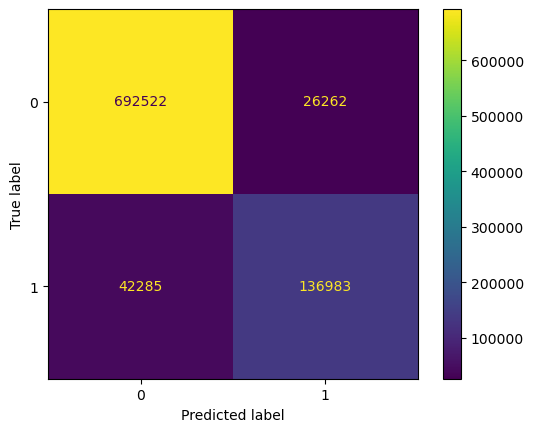

In [26]:
y_pred= model.predict(X_test_enc)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_enc, y_pred)).plot()

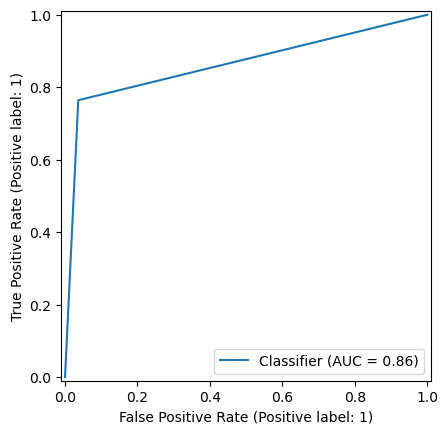

In [27]:
RocCurveDisplay.from_predictions(y_test_enc, y_pred)

In [28]:
df.is_fraud.value_counts()/len(df)

is_fraud
False    0.800175
True     0.199825
Name: count, dtype: float64

In [29]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    718784
           1       0.84      0.76      0.80    179268

    accuracy                           0.92    898052
   macro avg       0.89      0.86      0.88    898052
weighted avg       0.92      0.92      0.92    898052



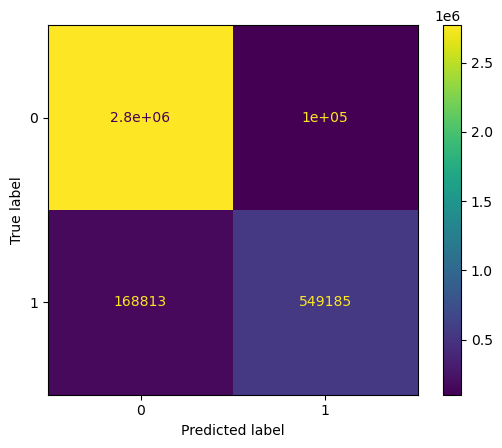

In [30]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_enc, model.predict(X_train_enc))).plot()

#### save the model

as well as encoders

In [31]:
import joblib
import os

# Ensure the directory exists
os.makedirs("./models/encoders", exist_ok=True)
# dump model
joblib.dump(model, './models/model.pkl')

joblib.dump(ct, './models/encoders/col_transformer.pkl')
joblib.dump(sc, './models/encoders/scaler.pkl')

# save freq_map for frequency encoder
joblib.dump(all_freq_map, './models/encoders/all_freq_map.pkl')

# save features names (during training)
joblib.dump(feature_names, './models/feature_names.pkl')

['./models/feature_names.pkl']

In [32]:
print(classification_report(y_train_enc, model.predict(X_train_enc)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95   2874210
           1       0.84      0.76      0.80    717998

    accuracy                           0.92   3592208
   macro avg       0.89      0.86      0.88   3592208
weighted avg       0.92      0.92      0.92   3592208



#### Feature Importance

In [33]:
model.coef_

array([[ 2.16440480e-03,  1.17653035e-02,  1.36445511e-03,
         9.89680923e-03, -2.94790509e-04,  7.77819780e-03,
        -1.02713887e-02, -2.23965163e-02,  7.93073937e-04,
         6.56159691e-03,  7.20647837e-03, -2.05331742e-02,
         6.11744451e-03, -1.43410224e-01,  5.09751589e-01,
        -1.04180471e-01, -1.35550610e-01, -8.89956063e-02,
         5.10547906e-01,  5.09832665e-01, -8.82842878e-02,
        -1.54233906e-01, -2.32278177e-01,  9.11085876e-01,
        -3.07721578e-01, -3.37388767e-03, -3.46094547e-03,
        -9.75242876e-03,  2.28790481e-01, -2.38290672e-02,
         9.61893888e-01, -4.18336293e-02,  9.11085876e-01,
         1.85567206e+00, -8.11038650e-03, -6.87293939e-01,
         6.61882211e-03]])

In [34]:
# Display feature names with their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
print(coef_df)

                            Feature  Coefficient
33               distance_from_home     1.855672
30                          country     0.961894
32                     card_present     0.911086
23                      channel_pos     0.911086
18           device_Magnetic Stripe     0.510548
19               device_NFC Payment     0.509833
14               device_Chip Reader     0.509752
28                           amount     0.228790
1   merchant_category_Entertainment     0.011765
3         merchant_category_Grocery     0.009897
5      merchant_category_Restaurant     0.007778
10            card_type_Gold Credit     0.007206
36              weekend_transaction     0.006619
9             card_type_Basic Debit     0.006562
12          card_type_Premium Debit     0.006117
0       merchant_category_Education     0.002164
2             merchant_category_Gas     0.001364
8            card_type_Basic Credit     0.000793
4      merchant_category_Healthcare    -0.000295
25                  

<Axes: >

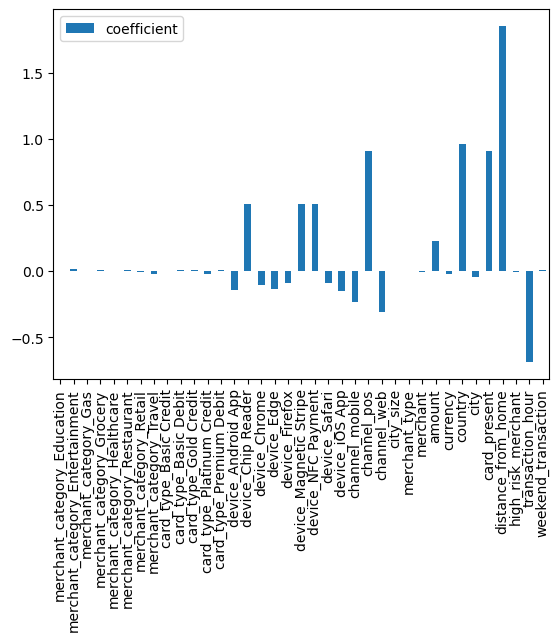

In [35]:
pd.DataFrame({'coefficient': model.coef_[0]}, index=feature_names).plot.bar()

#### make predictions

In [36]:
def make_prediction(pred_set_x):
    pred_set_x= ct.transform(pred_set_x)
    pred_set_x= sc.transform(pred_set_x)
    result= model.predict(pd.DataFrame(pred_set_x, columns=X_train_enc.columns))
    return le.inverse_transform(result)
    # for pred in result:    
    #     if pred:
    #         print("Danger")
    #     else:
    #         print('ok ')

make_prediction(X_test[10:12])

array([ True, False])

In [45]:
make_prediction(X_test.sample(15))

array([False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False,  True])

pred_df= pd.DataFrame([['Healthcare',	3124,	812,	724949.27,	7143,	7143,	47401,	'medium',	'Basic Debit',	False,	'Chrome',	'web',	1,	1,	False,	0,	False]],
                       columns=X_train.columns)
pred_df

make_prediction(pred_df)

In [46]:
make_prediction(X_test[10:16])

array([ True, False, False, False, False, False])

In [47]:
model.score(X_train_enc, y_train_enc), model.score(X_test_enc, y_test_enc)

(0.9242156912962723, 0.9236714577775006)

In [48]:
y_test_enc, model.predict(X_test_enc)

(array([0, 0, 0, ..., 0, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

In [49]:
import numpy as np
print(np.concatenate((y_test_enc.reshape(-1,1), model.predict(X_test_enc).reshape(-1,1)) , axis= 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 0]]


Make more predictions

In [53]:
stop here
made intentionally

SyntaxError: invalid syntax (3547097802.py, line 1)

#### The END

In [ ]:
def make_prediction(pred_set_x):
    pred_set_x= ct.transform(pred_set_x)
    pred_set_x= sc.transform(pred_set_x)
    result= model.predict(pd.DataFrame(pred_set_x, columns=X_train_enc.columns))
    return le.inverse_transform(result)
    # for pred in result:    
    #     if pred:
    #         print("Danger")
    #     else:
    #         print('ok ')

make_prediction(X_test[10:12])

array([False, False])

In [ ]:
X_test.head(2)

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
1208892,Gas,46634,15509,178494.74,79139,79139,698287,medium,Basic Debit,False,Safari,web,2,1,False,0,True
5249160,Restaurant,31518,5330,4254.53,79139,79139,698287,medium,Basic Debit,False,Firefox,web,54,0,False,18,False


In [ ]:
model.predict(sc.transform(ct.transform(X_test[10:13])))

c:\Users\me\ML\ML2\ML3\project\heart-disease\v_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0], dtype=int64)

In [ ]:
# frequency encoding
for col in freq_enc:
    freq= all_df[col][:1000].value_counts().to_dict()    
    print(col, " -> ", min(freq.values()))

merchant_type  ->  28
merchant  ->  1
currency  ->  59
country  ->  59
city  ->  5
device_fingerprint  ->  1


In [ ]:
del_df= all_df[10000:20000].copy()

In [ ]:
X_del = del_df.drop('is_fraud', axis=1)
X_del.drop(col_to_drop, axis=1, inplace=True)
X_del.head()

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
10000,Travel,airlines,Southwest,2.25,EUR,Germany,Unknown City,medium,Basic Credit,True,NFC Payment,pos,341e95c3735a23e61479874f5fc82b59,1,True,1,False
10001,Entertainment,gaming,Nintendo eShop,13724.19,RUB,Russia,Unknown City,medium,Basic Debit,False,Edge,web,cc915c6be9363c42dd94f489284ad3ed,0,True,1,False
10002,Healthcare,medical,Local Hospital,1661.73,EUR,Germany,Unknown City,medium,Basic Credit,True,NFC Payment,pos,3e335a0721c698bc20f4c372fc529831,1,False,1,False
10003,Grocery,physical,Kroger,230.09,EUR,France,Unknown City,medium,Basic Credit,False,Firefox,web,dc4c38126cd00a318a0ab65690b73168,0,False,1,False
10004,Restaurant,premium,Morton's,5248.88,BRL,Brazil,Unknown City,medium,Platinum Credit,False,Android App,mobile,823f71318241adc361bfdd63d405a1cc,0,False,1,False


In [ ]:
num_cols

['dis_from_home', 'transacton_hr', 'amount']

In [ ]:
X_del.head(2)

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
10000,Travel,airlines,Southwest,2.25,EUR,Germany,Unknown City,medium,Basic Credit,True,NFC Payment,pos,341e95c3735a23e61479874f5fc82b59,1,True,1,False
10001,Entertainment,gaming,Nintendo eShop,13724.19,RUB,Russia,Unknown City,medium,Basic Debit,False,Edge,web,cc915c6be9363c42dd94f489284ad3ed,0,True,1,False


In [ ]:
X_del.drop(ord_enc + num_cols, inplace=True, axis=1)

In [ ]:
del_X_train, del_X_test= train_test_split(X_del, test_size=0.4)

In [ ]:
# frequency encoding
all_freq_map= {}
for col in freq_enc:
    freq_map= del_X_train[col][:1000].value_counts().to_dict()
    all_freq_map[col]= freq_map
    # min_freq= min(freq.values())
    # print(min_freq)
    # del_X_train['new'+ col]= del_X_train[col].map(freq)
    # del_X_test['new'+ col]= del_X_test[col].map(freq)
    # print(col, " -> ", min(freq.values()))

In [ ]:
for col, freq in all_freq_map.items():
    del_X_train['new'+ col]= del_X_train[col].map(freq)
    del_X_test['new'+ col]= del_X_test[col].map(freq).fillna(min(freq.values()))

In [ ]:
pred_df= pd.DataFrame([['Healthcare',	3124,	812,	724949.27,	7143,	7143,	47401,	'medium',	'Basic Debit',	False,	'Chrome',	'web',	1,	1,	False,	0,	False]],
                       columns=X_train.columns)
pred_df

make_prediction(pred_df)

array([ True])

In [ ]:
X_train_enc

,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,card_type_Basic Credit,card_type_Basic Debit,...,amount,currency,country,city,card_present,device_fingerprint,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction
0,2.650966,-0.375515,-0.379615,-0.381025,-0.375225,-0.379125,-0.375746,-0.380219,-0.482342,-0.511328,...,-0.203529,0.298276,0.967928,0.264946,-0.305804,-0.441743,1.459160,-0.577183,1.049544,-0.588139
1,2.650966,-0.375515,-0.379615,-0.381025,-0.375225,-0.379125,-0.375746,-0.380219,-0.482342,-0.511328,...,-0.062088,0.296319,0.965219,0.264946,-0.305804,-0.213108,-0.685326,-0.577183,1.663208,-0.588139
2,-0.377221,-0.375515,-0.379615,-0.381025,2.665068,-0.379125,-0.375746,-0.380219,-0.482342,-0.511328,...,-0.267323,-0.993571,-0.820265,0.264946,3.270070,-1.127648,1.459160,-0.577183,0.742713,1.700278
3,-0.377221,-0.375515,-0.379615,2.624502,-0.375225,-0.379125,-0.375746,-0.380219,-0.482342,-0.511328,...,-0.230255,0.343295,1.030244,0.264946,-0.305804,-1.127648,1.459160,-0.577183,1.202960,1.700278
4,-0.377221,-0.375515,-0.379615,-0.381025,2.665068,-0.379125,-0.375746,-0.380219,-0.482342,-0.511328,...,-0.266386,-1.240196,-1.161647,-3.776224,-0.305804,0.244162,-0.685326,-0.577183,-1.098278,1.700278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59865,2.650966,-0.375515,-0.379615,-0.381025,-0.375225,-0.379125,-0.375746,-0.380219,2.073217,-0.511328,...,-0.271495,-0.686920,-0.395795,0.264946,-0.305804,-0.441743,-0.685326,-0.577183,0.129049,-0.588139
59866,-0.377221,-0.375515,-0.379615,2.624502,-0.375225,-0.379125,-0.375746,-0.380219,-0.482342,-0.511328,...,0.711951,0.675391,1.489936,0.264946,-0.305804,0.472798,-0.685326,-0.577183,0.435881,1.700278
59867,-0.377221,-0.375515,-0.379615,-0.381025,-0.375225,-0.379125,2.661371,-0.380219,-0.482342,-0.511328,...,0.592385,0.296319,0.965219,0.264946,-0.305804,-0.441743,-0.685326,-0.577183,0.589297,1.700278
59868,-0.377221,2.663012,-0.379615,-0.381025,-0.375225,-0.379125,-0.375746,-0.380219,-0.482342,1.955690,...,-0.271976,0.343295,1.030244,0.264946,-0.305804,-0.670378,-0.685326,1.732552,-1.251694,-0.588139


#### rough

In [ ]:
ct= ColumnTransformer(transformers=[
    ('one-hot', OneHotEncoder(), one_enc),
    ('ordinal', OrdinalEncoder(categories= [['medium', 'large']]), ord_enc),
    # ('bin-value', LabelEncoder(), label_enc)
    
], remainder='passthrough')

le= LabelEncoder()
sc= StandardScaler()

# encode features
X_train_enc= ct.fit_transform(X_train)
X_test_enc= ct.transform(X_test)

# encode label 
y_train_enc= le.fit_transform(y_train)
y_test_enc= le.transform(y_test)

# standardarize 
X_train_enc= sc.fit_transform(X_train_enc)  # only numeric and frequency encoded columns only 
X_test_enc= sc.transform(X_test_enc)

In [ ]:
X_train.columns

Index(['merchant_category', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'card_present', 'device',
       'channel', 'device_fingerprint', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction'],
      dtype='object')

In [ ]:
len(['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False])

17

In [ ]:
len(X_train.columns)

17

In [ ]:
model.predict(sc.transform(ct.transform(pd.DataFrame([['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False]], columns=list(X_train.columns)))))

c:\Users\me\ML\ML2\ML3\project\heart-disease\v_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
model.predict(pd.DataFrame(sc.transform(ct.transform(pd.DataFrame([['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False]], columns=list(X_train.columns)))), columns=feature_names))

array([0], dtype=int64)

In [ ]:
make_prediction(pd.DataFrame([['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False]], columns=X_train.columns))

array([False])

In [ ]:
pred = model.predict(sc.transform(ct.transform(
            [['Healthcare', 3124, 812, 724949.27, 7143, 7143, 47401, 'medium', 'Basic Debit', False, 'Chrome', 'web', 1,
             1, False, 0, False]])))

print(pred)

ValueError: Specifying the columns using strings is only supported for dataframes.

other models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2= RandomForestClassifier()

In [ ]:
model_2.fit(X_train_enc, y_train_enc)

RandomForestClassifier()

In [ ]:
model_2.score(X_test_enc, y_test_enc)

0.960515766969535